# ⭐ Variable Star Classifier — Demo Notebook

This notebook demonstrates:
- Loading 5 types of variable star light curves
- Plotting light curves
- Extracting features using `extract_features.py`
- Training a Random Forest classifier
- Viewing confusion matrix
- Predicting variable star types


In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn astropy joblib > /dev/null

## 📥 Load and Plot Sample Light Curves

In [6]:
from google.colab import files
uploaded = files.upload()


Saving cepheid[1].csv to cepheid[1] (1).csv
Saving deltasync[1].json to deltasync[1].json
Saving fontfaceonload[1].js to fontfaceonload[1].js
Saving jquery.min[1].js to jquery.min[1].js
Saving TopStories_72x72[1].png to TopStories_72x72[1].png


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

files = sorted(glob.glob('../data/*.csv'))
files

[]

In [10]:
plt.figure(figsize=(12,10))
for i, file in enumerate(files):
    df = pd.read_csv(file)
    plt.subplot(3,2,i+1)
    plt.plot(df['time'], df['flux'], linewidth=0.7)
    plt.title(df['label'][0])
    plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

In [21]:
import os

for f in os.listdir():
    if f.endswith(".csv") and f != "features.csv":
        os.remove(f)

os.listdir()


['.config',
 'features.csv',
 'deltasync[1] (1).json',
 'TopStories_72x72[1].png',
 'models',
 'TopStories_72x72[1] (1).png',
 'jquery.min[1].js',
 'deltasync[1].json',
 'jquery.min[1] (1).js',
 'train_classifier.py',
 'fontfaceonload[1] (1).js',
 'docs',
 '__pycache__',
 'extract_features.py',
 'fontfaceonload[1].js',
 'sample_data']

In [22]:
from google.colab import files
files.upload()


Saving variable_star_dataset_single.zip to variable_star_dataset_single.zip


{'variable_star_dataset_single.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x00\xdb:\x8f[*\xa7\xd88\xe9\x1e\x02\x00\xe9\x1e\x02\x00\x0c\x00\x00\x00rr_lyrae.csvtime,flux,label\n0.0,1.311798268160222,rr_lyrae\n0.009003001000333445,1.2791664671610115,rr_lyrae\n0.01800600200066689,1.2939268613217487,rr_lyrae\n0.027009003001000335,1.2724054530566353,rr_lyrae\n0.03601200400133378,1.2679519480714478,rr_lyrae\n0.045015005001667226,1.2813968055428304,rr_lyrae\n0.05401800600200067,1.2689108704828143,rr_lyrae\n0.06302100700233412,1.2539865998412543,rr_lyrae\n0.07202400800266756,1.242044482719435,rr_lyrae\n0.081027009003001,1.213707969789702,rr_lyrae\n0.09003001000333445,1.2316875117231783,rr_lyrae\n0.0990330110036679,1.1956848901069812,rr_lyrae\n0.10803601200400134,1.1833504046897085,rr_lyrae\n0.11703901300433478,1.1528133185369562,rr_lyrae\n0.12604201400466825,1.1152418088133509,rr_lyrae\n0.13504501500500168,1.1317891637751756,rr_lyrae\n0.14404801600533512,1.107323816552847,rr_lyrae\n0.153051017005668

In [26]:
import zipfile

with zipfile.ZipFile("variable_star_dataset_single.zip", "r") as zip_ref:
    zip_ref.extractall(".")


In [27]:
import os
os.listdir()


['.config',
 'features.csv',
 'deltasync[1] (1).json',
 'train_classifier (1).py',
 'rotational_variable.csv',
 'TopStories_72x72[1].png',
 'models',
 'TopStories_72x72[1] (1).png',
 'jquery.min[1].js',
 'deltasync[1].json',
 'delta_scuti.csv',
 'extract_features (1).py',
 'eclipsing_binary.csv',
 'jquery.min[1] (1).js',
 'train_classifier.py',
 'fontfaceonload[1] (1).js',
 'docs',
 '__pycache__',
 'cepheid.csv',
 'extract_features.py',
 'rr_lyrae.csv',
 'variable_star_dataset_single.zip',
 'fontfaceonload[1].js',
 'sample_data']

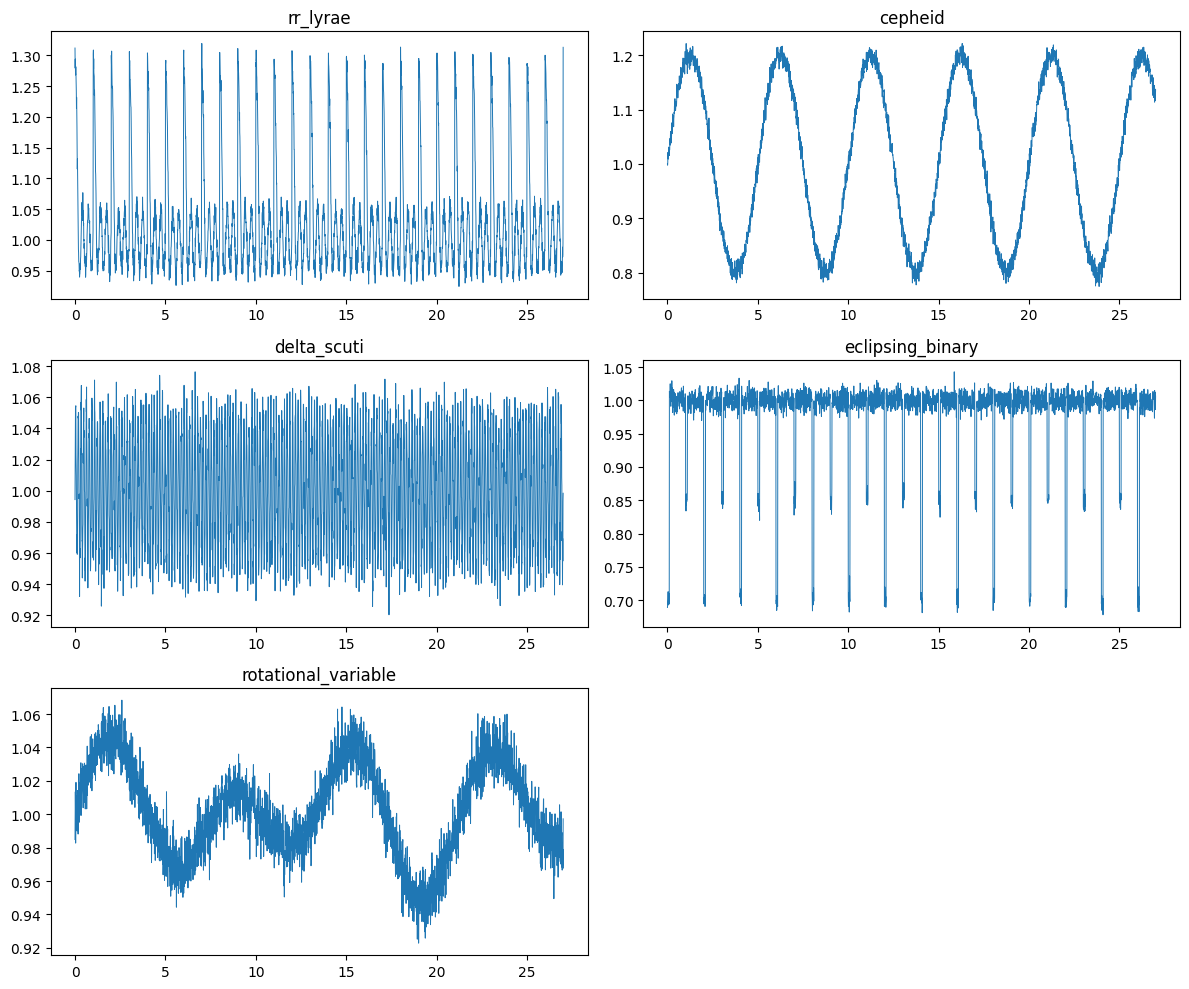

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

files = [
    'rr_lyrae.csv',
    'cepheid.csv',
    'delta_scuti.csv',
    'eclipsing_binary.csv',
    'rotational_variable.csv'
]

plt.figure(figsize=(12,10))

for i, file in enumerate(files):
    df = pd.read_csv(file)
    plt.subplot(3,2,i+1)
    plt.plot(df['time'], df['flux'], linewidth=0.7)
    plt.title(df['label'][0])
    plt.tight_layout()

plt.show()


## 🧠 Extract Features

In [23]:
from google.colab import files
uploaded = files.upload()


Saving train_classifier.py to train_classifier (1).py
Saving extract_features.py to extract_features (1).py


In [16]:
import sys
sys.path.append('../src')
from extract_features import extract_all

extract_all('.', 'features.csv')


Features saved to features.csv


## 🤖 Train Classifier

In [17]:
from train_classifier import train_classifier
train_classifier('features.csv')

Accuracy: 1.0000

Confusion Matrix:
[[1]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Model saved to models/variable_star_classifier.pkl
Confusion matrix saved to docs/confusion_matrix.png


## 📊 View Confusion Matrix

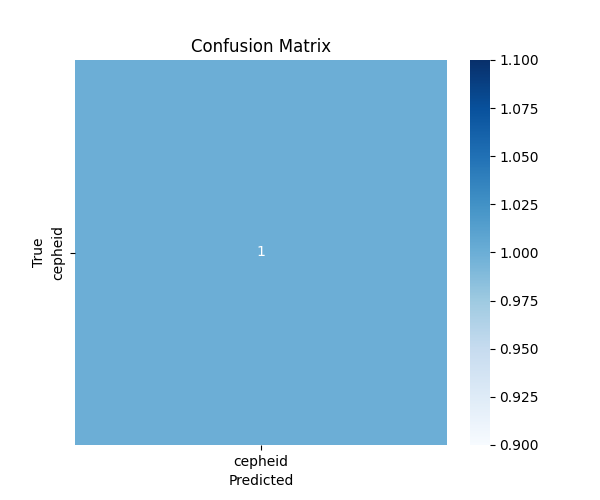

In [19]:
from IPython.display import Image
Image(filename='docs/confusion_matrix.png')
